## Business case
### Help stakeholder to make better financial decisions regarding selling and renovating houses with the potential for big investment returns according to data analysis in order to setup modeling for forecast .. use decision tree 

## Import Cleaned data 

In [250]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
# import to divide our data into train and test data
from sklearn.model_selection import train_test_split
# import to create polynomial features
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
RSEED = 50

In [252]:
data_tree=pd.read_csv('data/model_data.csv')
data_tree.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,sold_day,new_renovate,Age_house,new_id
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,...,47.5112,-122.257,1340,5650,2014,10,0,0,61,1
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,...,47.7210,-122.319,1690,7639,2014,12,1,1,65,1
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,...,47.7379,-122.233,2720,8062,2015,2,2,2,83,1
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,...,47.5208,-122.393,1360,5000,2014,12,1,0,51,1
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,...,47.6168,-122.045,1800,7503,2015,2,2,0,29,1


In [253]:
data_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   price          21597 non-null  float64
 4   bedrooms       21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  int64  
 7   sqft_lot       21597 non-null  int64  
 8   floors         21597 non-null  float64
 9   waterfront     19221 non-null  float64
 10  view           21534 non-null  float64
 11  condition      21597 non-null  int64  
 12  grade          21597 non-null  int64  
 13  sqft_above     21597 non-null  int64  
 14  sqft_basement  21597 non-null  object 
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17755 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

In [254]:
data_tree['price'].describe()    

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [255]:
data_tree['price'].isnull().sum()

0

In [256]:
# Define a custom function to categorize prices
def categorize_price(price):
    if price < 540296.6:
        return 'cheap'  # 0 represents "cheap"
    else:
        return 'expensive'  # 1 represents "expensive"

In [257]:
data_tree['price'] = data_tree['price'].apply(categorize_price)

In [258]:
data_tree.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,sold_day,new_renovate,Age_house,new_id
0,0,7129300520,2014-10-13,cheap,3,1.00,1180,5650,1.0,NaN,...,47.5112,-122.257,1340,5650,2014,10,0,0,61,1
1,1,6414100192,2014-12-09,cheap,3,2.25,2570,7242,2.0,0.0,...,47.7210,-122.319,1690,7639,2014,12,1,1,65,1
2,2,5631500400,2015-02-25,cheap,2,1.00,770,10000,1.0,0.0,...,47.7379,-122.233,2720,8062,2015,2,2,2,83,1
3,3,2487200875,2014-12-09,expensive,4,3.00,1960,5000,1.0,0.0,...,47.5208,-122.393,1360,5000,2014,12,1,0,51,1
4,4,1954400510,2015-02-18,cheap,3,2.00,1680,8080,1.0,0.0,...,47.6168,-122.045,1800,7503,2015,2,2,0,29,1


In [259]:
data_tree['price'] =pd.get_dummies(data_tree['price'],prefix='n_',drop_first=True, dtype= np.int64 )

In [260]:
data_tree.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,sold_day,new_renovate,Age_house,new_id
0,0,7129300520,2014-10-13,0,3,1.00,1180,5650,1.0,NaN,...,47.5112,-122.257,1340,5650,2014,10,0,0,61,1
1,1,6414100192,2014-12-09,0,3,2.25,2570,7242,2.0,0.0,...,47.7210,-122.319,1690,7639,2014,12,1,1,65,1
2,2,5631500400,2015-02-25,0,2,1.00,770,10000,1.0,0.0,...,47.7379,-122.233,2720,8062,2015,2,2,2,83,1
3,3,2487200875,2014-12-09,1,4,3.00,1960,5000,1.0,0.0,...,47.5208,-122.393,1360,5000,2014,12,1,0,51,1
4,4,1954400510,2015-02-18,0,3,2.00,1680,8080,1.0,0.0,...,47.6168,-122.045,1800,7503,2015,2,2,0,29,1


In [261]:
data_tree['price'].value_counts()

price
0    13680
1     7917
Name: count, dtype: int64

In [262]:
data_tree['price'].isnull().sum()

0

In [263]:
# data_tree = pd.get_dummies(data_tree, columns=['price'], prefix='price_')

In [264]:
# data_tree_dum = pd.get_dummies(data_tree.price, prefix='price_')
# data_tree_dum.head()

In [265]:
data_tree.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,sold_day,new_renovate,Age_house,new_id
0,0,7129300520,2014-10-13,0,3,1.00,1180,5650,1.0,NaN,...,47.5112,-122.257,1340,5650,2014,10,0,0,61,1
1,1,6414100192,2014-12-09,0,3,2.25,2570,7242,2.0,0.0,...,47.7210,-122.319,1690,7639,2014,12,1,1,65,1
2,2,5631500400,2015-02-25,0,2,1.00,770,10000,1.0,0.0,...,47.7379,-122.233,2720,8062,2015,2,2,2,83,1
3,3,2487200875,2014-12-09,1,4,3.00,1960,5000,1.0,0.0,...,47.5208,-122.393,1360,5000,2014,12,1,0,51,1
4,4,1954400510,2015-02-18,0,3,2.00,1680,8080,1.0,0.0,...,47.6168,-122.045,1800,7503,2015,2,2,0,29,1


In [266]:
data_tree[['price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   21597 non-null  int64
dtypes: int64(1)
memory usage: 168.9 KB


## Split Data Training and Test

In [267]:
# Split data into train and test set
X =data_tree[['sqft_living','bedrooms','Age_house','zipcode']] ## as we have good correlation between price and sqft_living and price and bedrooms
y=data_tree['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RSEED ,stratify=y) ## stratify parameter to balance split data ##stratify=y


## Create Baseline 
###  let's assume the threshold is= 2000 feet squared ,that mean when house has space more that 2000 feet squared is predicted expensive "1".and if the house has space less 2000 feet squared predicted cheaper "0"

In [268]:
data_tree['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [269]:
# Defining baseline model that predicts cheap and expensive house 

def baseline_model(df):
    y_pred = [1 if x >= 2000 else 0 for x in df['sqft_living']]
    return y_pred

In [270]:
y_baseline_test = baseline_model(X_test)

In [271]:
y_baseline_test

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,


## Modeling 
### Model name : Decision Tree

In [272]:
# import the regressor 
from sklearn.tree import DecisionTreeClassifier
  
# create a regressor object 
singl_tree= DecisionTreeClassifier()
  
# fit the regressor with X and Y data 
singl_tree.fit(X_train, y_train)  
  


DecisionTreeClassifier()

## Prediction

In [273]:
y_pred = singl_tree.predict(X_test)
y_pred_train = singl_tree.predict(X_train)

## Evaluation Basline Model 

Confusion Matrix :
[[2453  967]
 [ 421 1559]]
Accuracy Score : 0.7429629629629629
Report : 
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      3420
           1       0.62      0.79      0.69      1980

    accuracy                           0.74      5400
   macro avg       0.74      0.75      0.74      5400
weighted avg       0.77      0.74      0.75      5400



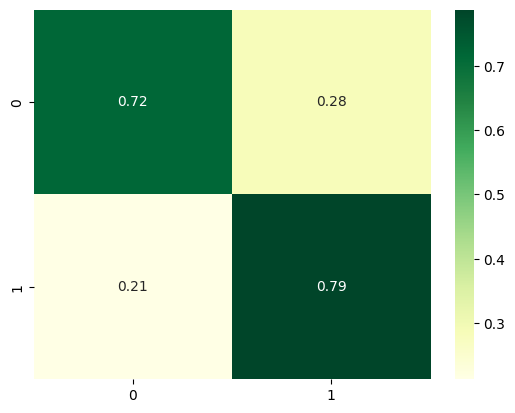

In [274]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report


# Here, we are creating a confusion matrix which compares actual and predicted values
#results = confusion_matrix(actual, predicted) 
results = confusion_matrix(y_test, y_baseline_test) 

print ('Confusion Matrix :')
print((results) )

results = results.astype('float') / results.sum(axis=1)[:, np.newaxis]  ### this to make percent instead of used numbers 

sns.heatmap(results, annot=True, cmap='YlGn');

print ('Accuracy Score :',accuracy_score(y_test, y_baseline_test))

print ('Report : ')
print (classification_report(y_test, y_baseline_test) )

## Evaluation Model use Test Data

Confusion Matrix :
[[2994  426]
 [ 400 1580]]


Accuracy Score : 0.847037037037037
Report : 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3420
           1       0.79      0.80      0.79      1980

    accuracy                           0.85      5400
   macro avg       0.83      0.84      0.84      5400
weighted avg       0.85      0.85      0.85      5400



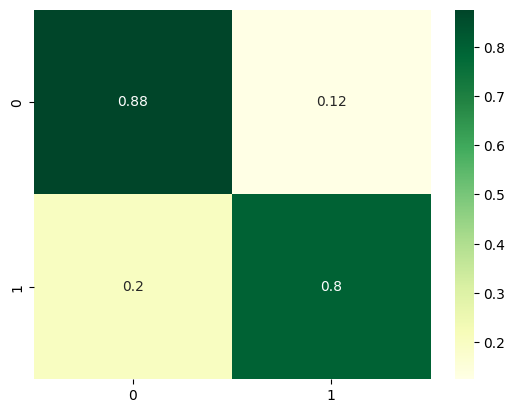

In [275]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report


# Here, we are creating a confusion matrix which compares actual and predicted values
#results = confusion_matrix(actual, predicted) 
results = confusion_matrix(y_test, y_pred) 

print ('Confusion Matrix :')
print((results) )

results = results.astype('float') / results.sum(axis=1)[:, np.newaxis]  ### this to make percent instead of used numbers 

sns.heatmap(results, annot=True, cmap='YlGn');

print ('Accuracy Score :',accuracy_score(y_test, y_pred ))

print ('Report : ')
print (classification_report(y_test, y_pred) )

## Evaluation model use Train Data

Confusion Matrix :
[[10259     1]
 [   43  5894]]
Accuracy Score : 0.9972834475520158
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10260
           1       1.00      0.99      1.00      5937

    accuracy                           1.00     16197
   macro avg       1.00      1.00      1.00     16197
weighted avg       1.00      1.00      1.00     16197



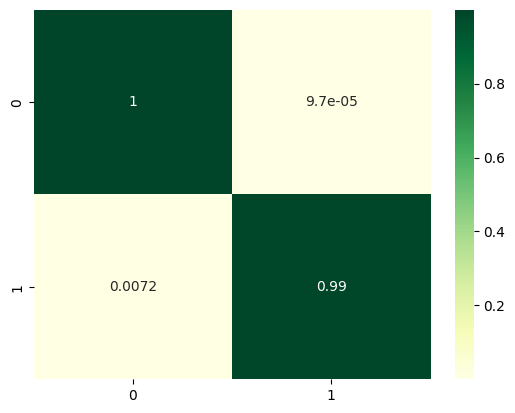

In [276]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report


# Here, we are creating a confusion matrix which compares actual and predicted values
#results = confusion_matrix(actual, predicted) 
results = confusion_matrix(y_train, y_pred_train) 

print ('Confusion Matrix :')
print((results) )

results = results.astype('float') / results.sum(axis=1)[:, np.newaxis]  ### this to make percent instead of used numbers 

sns.heatmap(results, annot=True, cmap='YlGn');


print ('Accuracy Score :',accuracy_score(y_train, y_pred_train ))

print ('Report : ')
print (classification_report(y_train, y_pred_train) )

## Tune Hyperparameter 

In [277]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Define the Decision Tree model for classification
model = DecisionTreeClassifier()

# Define evaluation using stratified k-fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define search space (hyperparameters for Decision Tree)
space = dict()
space['criterion'] = ['gini', 'entropy']  # Splitting criterion
space['max_depth'] = [None, 10, 20, 30, 40, 50]  # Maximum depth of the tree
space['min_samples_split'] = [2, 5, 10]  # Minimum number of samples required to split an internal node
space['min_samples_leaf'] = [1, 2, 4]  # Minimum number of samples required to be at a leaf node

# Define the randomized search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# Execute the search
result = search.fit(X_train, y_train)  # Replace X_train and y_train with your training data

# Summarize the result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


244959.11s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
244959.11s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
244959.11s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
244959.13s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
244959.13s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
244959.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
244959.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
244959.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debuggi

Best Score: 0.8621343765012697
Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None, 'criterion': 'entropy'}


In [278]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier( min_samples_split= 10, min_samples_leaf= 4, max_depth=50, criterion= 'entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf=4,
                       min_samples_split=10)

## Prediction 

In [279]:
y_pred_h = model.predict(X_test)
y_pred_train = model.predict(X_train)


## Evaluation Model

Confusion Matrix :
[[2994  426]
 [ 400 1580]]
Accuracy Score : 0.8555555555555555
Report : 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3420
           1       0.79      0.80      0.79      1980

    accuracy                           0.85      5400
   macro avg       0.83      0.84      0.84      5400
weighted avg       0.85      0.85      0.85      5400



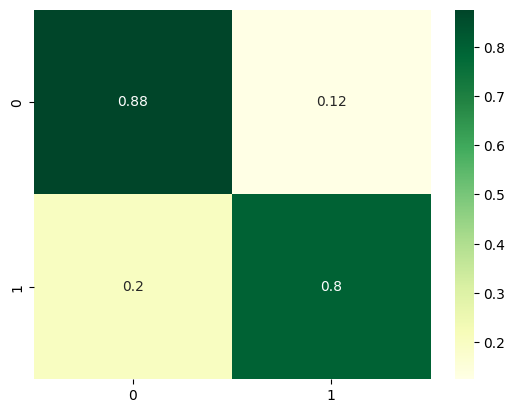

In [280]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report


# Here, we are creating a confusion matrix which compares actual and predicted values
#results = confusion_matrix(actual, predicted) 
results = confusion_matrix(y_test, y_pred) 

print ('Confusion Matrix :')
print((results) )

results = results.astype('float') / results.sum(axis=1)[:, np.newaxis]  ### this to make percent instead of used numbers 

sns.heatmap(results, annot=True, cmap='YlGn');

print ('Accuracy Score :',accuracy_score(y_test, y_pred_h ))

print ('Report : ')
print (classification_report(y_test, y_pred) )

In [281]:
from sklearn.metrics import roc_curve     # this method roc_curve() retune 3 out put false positive rate and true positive rate and threshold 
fpr_baseline, tpr_baseline, thresholds_baseline = roc_curve(y_test, y_baseline_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred)
fpr_train, tpr_train, thresholds_train = roc_curve(y_test, y_pred_h)


In [282]:
from sklearn.metrics import roc_auc_score

auc_test = roc_auc_score(y_test, y_pred)
auc_hyper = roc_auc_score(y_test, y_pred_h)
auc_baseline = roc_auc_score(y_test, y_baseline_test)

print('AUC Test:%.3f'% auc_test)
print('AUC Train:%.3f'% auc_hyper)
print('AUC Baseline:%.3f'% auc_baseline)


AUC Test:0.837
AUC Train:0.838
AUC Baseline:0.752


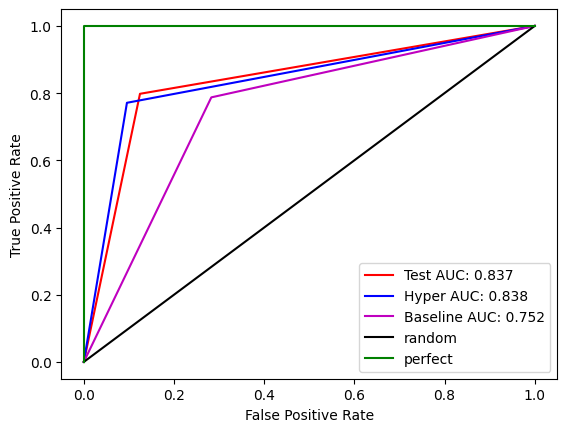

In [283]:
import matplotlib.pyplot as plt

plt.plot(fpr_test,tpr_test,'r-',label = 'Test AUC: %.3f'%auc_test)
plt.plot(fpr_train,tpr_train,'b-', label= 'Hyper AUC: %.3f'%auc_hyper)
plt.plot(fpr_baseline,tpr_baseline,'m-', label= 'Baseline AUC: %.3f'%auc_baseline)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()